First, we should upload physionet motor imagery dataset. in this case, we have access to the data via wget.

In [2]:
!wget -r -N -c -np https://physionet.org/files/eegmmidb/1.0.0/

Streaming output truncated to the last 5000 lines.
Length: 2064384 (2.0M) [application/octet-stream]
Saving to: ‘physionet.org/files/eegmmidb/1.0.0/S092/S092R03.edf’

physionet.org/files 100%[===================>]   1.97M  --.-KB/s    in 0.02s   

2021-10-31 14:48:56 (107 MB/s) - ‘physionet.org/files/eegmmidb/1.0.0/S092/S092R03.edf’ saved [2064384/2064384]

--2021-10-31 14:48:56--  https://physionet.org/files/eegmmidb/1.0.0/S092/S092R03.edf.event
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 566 [text/plain]
Saving to: ‘physionet.org/files/eegmmidb/1.0.0/S092/S092R03.edf.event’

physionet.org/files 100%[===================>]     566  --.-KB/s    in 0s      

2021-10-31 14:48:56 (93.6 MB/s) - ‘physionet.org/files/eegmmidb/1.0.0/S092/S092R03.edf.event’ saved [566/566]

--2021-10-31 14:48:56--  https://physionet.org/files/eegmmidb/1.0.0/S092/S092R04.edf
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting 

In [3]:
# install mne to load .edf files
!pip install mne

     |████████████████████████████████| 6.9 MB 3.8 MB/s 


In [4]:
# import necessary packages
import numpy as np
import mne
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, LSTM
from keras.layers import Conv2D
from keras.layers import BatchNormalization, Activation, Reshape

In [5]:
# data loading ...
%cd /content/physionet.org/files/eegmmidb/1.0.0/
import os
SList = ["%03d"%i for i in range(1,110)]
RList = ["%02d"%i for i in range(1,15)]
Lists = []
for j in SList:
    name = 's'+str(j)
    name = np.zeros((64, 160))
    name = np.expand_dims(name, axis=0)
    for i in RList:
        file = os.getcwd()+'/S'+str(j)+'/S'+str(j)+'R'+str(i)+'.edf'
        data = mne.io.read_raw_edf(file)
        raw_data = data.get_data()

        # 1 sec parts
        for k in range(int((np.size(raw_data,1))/160)):
          name = np.concatenate((name, np.expand_dims(raw_data[:, (k)*160:(k+1)*160], axis=0)), axis=0)
        
        # free up memory
        path = []
        cwd = os.getcwd()
        file = os.getcwd()+'/S'+str(j)+'/S'+str(j)+'R'+str(i)+'.edf'
        path.append(os.path.join(cwd, file))
        os.remove(path[0])
    name = name[1:np.size(name, 0), :, :]
    subj = 'S'+str(j)
    np.save(subj, name)


Streaming output truncated to the last 5000 lines.
Extracting EDF parameters from /content/physionet.org/files/eegmmidb/1.0.0/S010/S010R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/physionet.org/files/eegmmidb/1.0.0/S011/S011R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/physionet.org/files/eegmmidb/1.0.0/S011/S011R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/physionet.org/files/eegmmidb/1.0.0/S011/S011R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/physionet.org/files/eegmmidb/1.0.0/S011/S011R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/physionet.org/files

<ipython-input-5-70f452e80124>:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /content/physionet.org/files/eegmmidb/1.0.0/S100/S100R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-5-70f452e80124>:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /content/physionet.org/files/eegmmidb/1.0.0/S100/S100R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-5-70f452e80124>:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /content/physionet.org/files/eegmmidb/1.0.0/S100/S100R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-5-70f452e80124>:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /content/physionet.org/files/eegmmidb/1.0.0/S100/S100R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-5-70f452e80124>:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /content/physionet.org/files/eegmmidb/1.0.0/S100/S100R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-5-70f452e80124>:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /content/physionet.org/files/eegmmidb/1.0.0/S100/S100R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-5-70f452e80124>:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /content/physionet.org/files/eegmmidb/1.0.0/S100/S100R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-5-70f452e80124>:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /content/physionet.org/files/eegmmidb/1.0.0/S100/S100R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-5-70f452e80124>:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /content/physionet.org/files/eegmmidb/1.0.0/S100/S100R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-5-70f452e80124>:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /content/physionet.org/files/eegmmidb/1.0.0/S100/S100R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-5-70f452e80124>:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /content/physionet.org/files/eegmmidb/1.0.0/S100/S100R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-5-70f452e80124>:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /content/physionet.org/files/eegmmidb/1.0.0/S101/S101R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/physionet.org/files/eegmmidb/1.0.0/S101/S101R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/physionet.org/files/eegmmidb/1.0.0/S101/S101R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/physionet.org/files/eegmmidb/1.0.0/S101/S101R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/physionet.org/files/eegmmidb/1.0.0/S101/S101R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/physionet.org/files/eegmmidb/1.0.0/S101/S101R06.edf...
EDF file detect

four blocks below are written for choosing the number of electrodes. you should run only one of those!

In [ ]:
# Selecting Channels
SList = ["%03d"%i for i in range(1,110)]
RList = ["%02d"%i for i in range(1,15)]

# For 3 Channels
channels3 = [8,10,12]
for j in SList:
  name = 'S'+str(j)+'.npy'
  a = np.load(name)
  a = a[:, channels3, :]
  subject = 's'+str(j)
  np.save(subject, a)

In [6]:
# Selecting Channels
SList = ["%03d"%i for i in range(1,110)]
RList = ["%02d"%i for i in range(1,15)]

# For 4 Channels
channels4 = [31,35,48,52]
for j in SList:
  name = 'S'+str(j)+'.npy'
  a = np.load(name)
  a = a[:, channels4, :]
  subject = 's'+str(j)
  np.save(subject, a)

In [ ]:
# Selecting Channels
SList = ["%03d"%i for i in range(1,110)]
RList = ["%02d"%i for i in range(1,15)]

# For 16 Channels
channels16 = [8,10,12,21,23,29,31,35,37,40,41,46,48,50,52,54]
for j in SList:
  name = 'S'+str(j)+'.npy'
  a = np.load(name)
  a = a[:, channels16, :]
  subject = 's'+str(j)
  np.save(subject, a)

In [ ]:
# Selecting Channels
SList = ["%03d"%i for i in range(1,110)]
RList = ["%02d"%i for i in range(1,15)]

# For 32 Channels
channels32 = [0,2,3,4,6,8,10,12,14,16,17,18,20,21,22,23,26,29,31,33,35,37,40,41,46,48,50,52,54,57,60,62]
for j in SList:
  name = 'S'+str(j)+'.npy'
  a = np.load(name)
  a = a[:, channels32, :]
  subject = 's'+str(j)
  np.save(subject, a)

In [7]:
# Assigning p% of data for training
SList = ["%03d"%i for i in range(1,110)]
RList = ["%02d"%i for i in range(1,15)]
p = 0.9
for j in SList:
  name = 's'+str(j)+'.npy'
  a = np.load(name)
  shuffle = list(range(np.size(a, 0)))
  np.random.shuffle(shuffle)
  a = a[shuffle, :, :]
  num_tr = int(p*np.size(a, 0))
  x_tr = a[0:num_tr, :, :]
  x_te = a[num_tr+1:np.size(a,0), :, :]
  subject_tr = 's'+str(j)+'_train'
  subject_te = 's'+str(j)+'_test'
  np.save(subject_tr, x_tr)
  np.save(subject_te, x_te)
  print(j)

001
002
003
004
005
006
007
008
009
010
011
012
013
014
015
016
017
018
019
020
021
022
023
024
025
026
027
028
029
030
031
032
033
034
035
036
037
038
039
040
041
042
043
044
045
046
047
048
049
050
051
052
053
054
055
056
057
058
059
060
061
062
063
064
065
066
067
068
069
070
071
072
073
074
075
076
077
078
079
080
081
082
083
084
085
086
087
088
089
090
091
092
093
094
095
096
097
098
099
100
101
102
103
104
105
106
107
108
109


In [8]:
# Train set

SList = ["%03d"%i for i in range(1,110)]
RList = ["%02d"%i for i in range(1,15)]
import numpy as np

# note that n_ch should be equal to what you selected in channel selection step!
# here we chose 4
n_ch = 4
y_train = np.zeros((1, 1))
x_train = np.zeros((1, n_ch, 160))
for j in SList:
  name = 's'+str(j)+'_train.npy'
  a = np.load(name)
  x_train = np.concatenate((x_train, a), axis=0)
  y = (int(j)-1)*np.ones((np.size(a, 0), 1))
  y_train = np.concatenate((y_train, y))
  print(j)
del a
del y

001
002
003
004
005
006
007
008
009
010
011
012
013
014
015
016
017
018
019
020
021
022
023
024
025
026
027
028
029
030
031
032
033
034
035
036
037
038
039
040
041
042
043
044
045
046
047
048
049
050
051
052
053
054
055
056
057
058
059
060
061
062
063
064
065
066
067
068
069
070
071
072
073
074
075
076
077
078
079
080
081
082
083
084
085
086
087
088
089
090
091
092
093
094
095
096
097
098
099
100
101
102
103
104
105
106
107
108
109


In [9]:
# Test set

# note that n_ch should be equal to what you selected in channel selection step!
# here we chose 4
n_ch = 4
y_test = np.zeros((1, 1))
x_test = np.zeros((1, n_ch, 160))
for j in SList:
  name = 's'+str(j)+'_test.npy'
  a = np.load(name)
  x_test = np.concatenate((x_test, a), axis=0)
  y = (int(j)-1)*np.ones((np.size(a, 0), 1))
  y_test = np.concatenate((y_test, y))
  print(j)
del a
del y


001
002
003
004
005
006
007
008
009
010
011
012
013
014
015
016
017
018
019
020
021
022
023
024
025
026
027
028
029
030
031
032
033
034
035
036
037
038
039
040
041
042
043
044
045
046
047
048
049
050
051
052
053
054
055
056
057
058
059
060
061
062
063
064
065
066
067
068
069
070
071
072
073
074
075
076
077
078
079
080
081
082
083
084
085
086
087
088
089
090
091
092
093
094
095
096
097
098
099
100
101
102
103
104
105
106
107
108
109


In [10]:
# deleting one unwanted index
x_train = x_train[1:np.size(x_train, 0), :, :]
x_test = x_test[1:np.size(x_test, 0), :, :]
y_train = y_train[1:np.size(y_train, 0), :]
y_test = y_test[1:np.size(y_test, 0), :]

# data shape
print('x_train shape is:   ', np.shape(x_train))
print('x_test shape is:   ', np.shape(x_test))
print('y_train shape is:   ', np.shape(y_train))
print('y_test shape is:   ', np.shape(y_test))
input_shape = (x_train.shape[1], x_train.shape[2], 1)
print('input shape is:   ', input_shape)

x_train shape is:    (156405, 4, 160)
x_test shape is:    (17310, 4, 160)
y_train shape is:    (156405, 1)
y_test shape is:    (17310, 1)
input shape is:    (4, 160, 1)


In [11]:
#normalizing your data
maxMat = np.amax(x_train, axis = 0, keepdims=True)

x_train = np.divide(x_train, maxMat)
x_test = np.divide(x_test, maxMat)
del maxMat

In [12]:
# shuffling data

shuffle = list(range(np.size(x_train, 0)))
np.random.shuffle(shuffle)
x_train = x_train[shuffle, :, :]
y_train = y_train[shuffle, ]

shuffle = list(range(np.size(x_test, 0)))
np.random.shuffle(shuffle)
x_test = x_test[shuffle, :, :]
y_test = y_test[shuffle, ]

print('x_train shape is:   ', np.shape(x_train))
print('x_test shape is:   ', np.shape(x_test))
print('y_train shape is:   ', np.shape(y_train))
print('y_test shape is:   ', np.shape(y_test))
input_shape = (x_train.shape[1], x_train.shape[2], 1)
print('input shape is:   ', input_shape)
del shuffle


x_train shape is:    (156405, 4, 160)
x_test shape is:    (17310, 4, 160)
y_train shape is:    (156405, 1)
y_test shape is:    (17310, 1)
input shape is:    (4, 160, 1)


In [14]:
# Data preparation for CNN

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
import keras
from keras.utils import np_utils

num_classes = 109
y_train = np.reshape(y_train,[np.size(y_train,0),])
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np.reshape(y_test,[np.size(y_test,0),])
y_test = np_utils.to_categorical(y_test, num_classes)

print('x_train shape is:   ', np.shape(x_train))
print('x_test shape is:   ', np.shape(x_test))
print('y_train shape is:   ', np.shape(y_train))
print('y_test shape is:   ', np.shape(y_test))
input_shape = (x_train.shape[1], x_train.shape[2], 1)
print('input shape is:   ', input_shape)


x_train shape is:    (156405, 4, 160, 1)
x_test shape is:    (17310, 4, 160, 1)
y_train shape is:    (156405, 109)
y_test shape is:    (17310, 109)
input shape is:    (4, 160, 1)


In [15]:
# Network Architecture
# you can uncomment the commented lines in the architecture below !

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, LSTM
from keras.layers import Conv2D
from keras.layers import BatchNormalization, Activation, Reshape

model = Sequential()

#layer1
model.add(Conv2D(128, kernel_size=(n_ch, 1), padding="valid", input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Reshape((model.output_shape[3],model.output_shape[2],model.output_shape[1])))
#model.add(AveragePooling2D(pool_size=(1, 2)))
#model.add(Dropout(0.1))

## Layer 2
model.add(Conv2D(256, kernel_size=(128, 1), padding="valid"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Reshape((model.output_shape[3],model.output_shape[2],model.output_shape[1])))
#model.add(AveragePooling2D(pool_size=(1, 2)))
#model.add(Dropout(0.1))

## Layer 3
model.add(Conv2D(512, kernel_size=(256, 1), padding="valid"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Reshape((model.output_shape[3],model.output_shape[2],model.output_shape[1])))
#model.add(AveragePooling2D(pool_size=(1, 2)))
#model.add(Dropout(0.1))

## Layer 4
#model.add(Conv2D(1024, kernel_size=(512, 2), padding="valid"))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
#model.add(Reshape((model.output_shape[3],model.output_shape[2],model.output_shape[1])))
#model.add(AveragePooling2D(pool_size=(4, 1)))
model.add(Flatten())


## layer 5
#model.add(Dense(192))
#model.add(Activation('relu'))
#model.add(Dropout(0.4))


#model.add(Reshape((model.output_shape[1], 1)))
## layer 6
#model.add(LSTM(192))

#model.add(Reshape((model.output_shape[1], 1)))
## layer 7
#model.add(LSTM(192))


## layer 8
#model.add(Dense(192))


## layer 9
#model.add(Dense(192))


#output layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 160, 128)       640       
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 160, 128)       512       
_________________________________________________________________
activation (Activation)      (None, 1, 160, 128)       0         
_________________________________________________________________
reshape (Reshape)            (None, 128, 160, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 160, 256)       33024     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 160, 256)       1024      
_________________________________________________________________
activation_1 (Activation)    (None, 1, 160, 256)       0

In [17]:
# Train the model

import tensorflow as tf
batch_size = 128
epochs = 25

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=0.001, decay=0.01),
              metrics=['accuracy',
                       'FalsePositives',
                       'FalseNegatives'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          shuffle=False,
          verbose=1,
          validation_split=0.25)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25
917/917 [==============================] - 80s 54ms/step - loss: 2.1969 - accuracy: 0.4499 - false_positives: 8720.0000 - false_negatives: 84657.0000 - val_loss: 1.4111 - val_accuracy: 0.6015 - val_false_positives: 3209.0000 - val_false_negatives: 22756.0000
Epoch 2/25
917/917 [==============================] - 44s 48ms/step - loss: 0.8197 - accuracy: 0.7728 - false_positives: 7735.0000 - false_negatives: 41307.0000 - val_loss: 0.9307 - val_accuracy: 0.7353 - val_false_positives: 4290.0000 - val_false_negatives: 14345.0000
Epoch 3/25
917/917 [==============================] - 44s 48ms/step - loss: 0.4748 - accuracy: 0.8796 - false_positives: 4266.0000 - false_negatives: 23826.0000 - val_loss: 0.8229 - val_accuracy: 0.7670 - val_false_positives: 4354.0000 - val_false_negatives: 12267.0000
Epoch 4/25
917/917 [==============================] - 44s 48ms/step - loss: 0.3200 - accuracy: 0.9286 - false_positives: 2410.0000 - false_negatives: 15192.0000 - val_loss: 0.7626 - val_accu

In [18]:
# model evaluation

score_train = model.evaluate(x_train, y_train, verbose=0)
score_test = model.evaluate(x_test, y_test, verbose=0)
print("mean train accuracy is:   ", (score_train[1]))
print("mean test accuracy is:   ", (score_test[1]))

print("FAR is:   ", (score_train[2]+score_test[2])/(np.size(y_train,0)+np.size(y_test,0)))
print("FRR is:   ", (score_train[3]+score_test[3])/(np.size(y_train,0)+np.size(y_test,0)))

mean train accuracy is:    0.9500399827957153
mean test accuracy is:    0.81444251537323
FAR is:    0.04685260340212417
FRR is:    0.07395446564775639


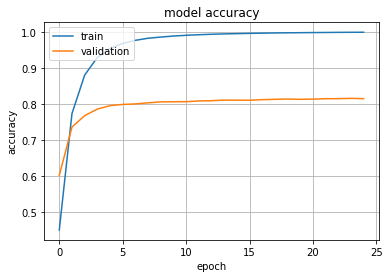

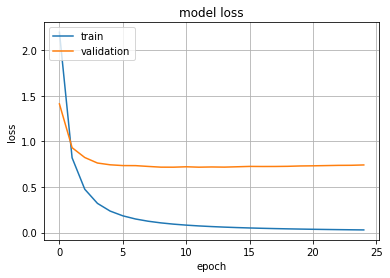

In [19]:
# Loss and Accuracy curves

import matplotlib.pyplot as plt
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid(True)
plt.savefig('acc8.png', dpi=600)
plt.show()

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid(True)
plt.savefig('loss8.png', dpi=600)
plt.show()
